# Практическая работа №2: Исследование задач о раскрасках

Выполнил студент группы 9304 Боблаков Дмитрий, вариант 27

## Цель работы

Формирование представления о задачах о раскрасках, выработать умение использование леммы Бёрнсайда для решения задачи о раскрасках, привить навык использования систем компьютерной алгебры для реализации алгоритмов решения задачи.

## Основные теоретические положения


**Def**
Пусть $ G $ — группа с нейтральным элементом $ e $, $ X $ — множество. Тогда $ G $ называется действием на множество $ X $, если задана операция $ G \times X \to G $, обладающая для любого $x \in X$ и $g,h \in G$ следующими свойствами:

  * ex = x
  * g(hx) = (gh)x

Орбитой элемента $ x \in X $ под действием группы $ G $ называется множество $ Gx = \left\{ gx \; \middle| \; g \in G \right\} $.

Количество элементов множества $ Gx $ называется длиной орбиты.

Неподвижными точками элемента $ g \in G $ называются такие $ x \in X $, для которых $ gx = x $.

Множество неподвижных точек элемента $ g \in G $ обозначается $ X^{g} $.

**Def**
Пусть $I$ - произвольное множество, $C$ - множество цветов. Раскраской множетсва $I$ называется функция $I->&gt;G$. $C^I$ - множество всех раскрасок. $\# C^I=(\#C)^{\#I}$

**Def**
Пусть $G$ - группа, действует на множестве $I$, тогда $gf(i)=f(g^{-1}i)$, где $g \in G, i \in I, f \in C^I$ задаёт действие $G$ на множество $C^I$

***Лемма Бернсайда***

*Количество орбит действия группы G на множестве X равно*
$$ \begin{aligned} \cfrac{1}{|G|}\sum_{g \in G}|X^g| \end{aligned} $$



## Постановка задачи

Аналитически решить задачу о раскрасках, графически отобразить решение задачи с использованием системы компьютерной алгебры SageMath. Полученные результаты содержательно проинтерпретировать.

***Условие задачи***

Сколькими способами можно составить бусы из 35 бусинок 3 различных цветов (с точностью до поворотов  и осевых симетрий)?

## Порядок выполнения работы
    
    1)Аналитически решить задачу о раскрасках для заданного варианта. Все умозаключения в ходе решения обосновать и содержательно проинтерпретировать.
    
    2)Реализовать средствами SageMath функцию, отображающую графически раскраску по заданному номеру. Продемонстрировать работу функции на нескольких примерах. Сделать выводы.
    
    3)Дополнительное необязательное задание: для заданного варианта решить задачу в общем виде.

**Аналитическое решение**


Имеем набор цветов $\{a,b,c,d,e\}$ и набор бусинок $\{x_1, x_2,...,x_{35}\}$, при чем каждая окрашена в какой либо из доступных цветов. Существует всего $3^{35}$ вариантов бус. Стоит заметить, что не все бусы уникальны, некоторые бусы получены в результате операций поворота или осевой симметрии другого экземпляра. Обозначим множество $X$ - множество всех раскрасок.


Имеем группу $G$, которая действует на множестве мест $\{1, 2, ..., 35\}$. Задано отображение из $G$ в симметрическую группу $T_{35}$

* $\tau$ - поворот 
* $\sigma$ - осевая симметрия
* $e$ - тождественное преобразование



Запишем в виде перестановки операции: $e = \begin{pmatrix} 1 & 2 & 3 & ... & 35\\ 1 & 2 &3 & ... & 35 \end{pmatrix} = (1)(2)(3)...(35)$

$\tau = \begin{pmatrix} 1 & 2 & 3 & ... & 34\\ 2 & 3 & 4 & ... & 1 \end{pmatrix} = (1,2,3,...,35)$



$\sigma = \begin{pmatrix} 1 & 2 & ...& 34 & 35 \\\ 35 & 34 & ... &2 & 1 \end{pmatrix} = (1 \ 35)(2 \ 34)...(17 \ 19)(18)$

$\sigma^2 = e$

$|X^e| \ = \ 3^{35}$


$|X^{\tau^i}| = 3^1$, где $i \in \{1..34\},$ исключая $i\%5 = 0$ и $i\%7 = 0$


$|X^{\tau^{5}}| = |X^{\tau^{10}}| = |X^{\tau^{15}}| = ... = |X^{\tau^{30}}| = 3^{5}$


$|X^{\tau^{7}}| = |X^{\tau^{14}}|= ... = |X^{\tau^{28}}|=3^{7}$


$|X^{\sigma}| = |X^{\sigma \tau}| = |X^{\sigma \tau^2}| = ... = |X^{\sigma \tau^{34}}| = 3^{18}$


$|G| = 70$

In [76]:
print((1/70)*(3**35 + 24*3**1 + 6*3**5 + 4*3**7 + 35*3**18))

714736552267530


**Реализация отображения раскраски**

In [37]:
import random
import time

In [62]:
def rotation(beads): 
    return  beads[1:] + beads[:1]

def reflect(beads): 
    return [beads[-i] for i in range(1,36)]

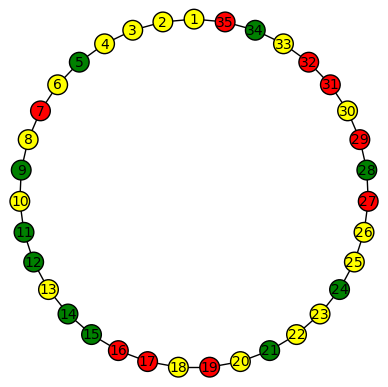

In [72]:
def bead_color(i): 
    colors=['red','green','yellow']
    return colors[i-1]

def print_beads(beads):
    graph = graphs.CycleGraph(35)
    graph.relabel({i:beads[i][0] for i in range(35)})
    colors={'red':[],'green':[],'yellow':[]}
    for i in beads:
        colors[bead_color(i[1])].append(i[0])
    plot=graph.graphplot(vertex_colors=colors)
    plot.show()
    return

beads = []
for i in range(1,36):
    beads.append([i,random.randint(1,3)])
    
print_beads(beads)



Исходные бусы

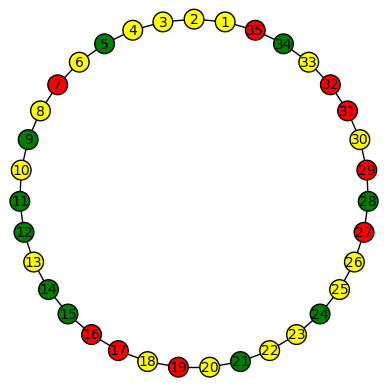

In [73]:
print_beads(rotation(beads))

Поворот на одну позицию

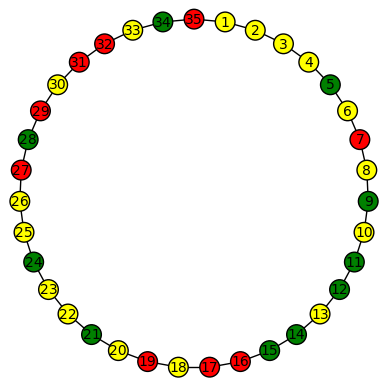

In [74]:
print_beads(reflect(beads))

Отражение по оси симметрии

## Вывод
В ходе выполнения работы были сформированы навыки решения задач о раскрасках, таккже была глубже разобрана лемма Бёрнсайда. Получены навыки использования системы SageMath. Было реализовано графическое представление раскраски и действий над нею.
